<a href="https://colab.research.google.com/github/khaireddine-satouri/TER-2022-2023/blob/main/Material_Behavior_Predection_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
NUMBER_OF_OBSERVATIONS = 600  # Number of iterations to observe the progression of values
GRAIN = 10                    # the grain classes 
PHI1 = 104.3                 # First bunge angle
PSI = 92.0                    # Second bunge angle
PDHI2 = 190.49                # Third bunge angle 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve

In [173]:
# Charger les données
df = pd.read_excel("Data_Sheet.xlsx", header=0)
df.head()

,Grain,Phi1 (°),Psi (°),Phi2 (°),h (nm),P (mN),x (µm),d (nm)
0,10,105.81,94.4,192.38,0.000000,0.000000,-2.390996,64.32688
1,10,105.81,94.4,192.38,1.817280,4.001145,-2.381237,64.46653
2,10,105.81,94.4,192.38,2.879298,9.905321,-2.371478,64.85121
3,10,105.81,94.4,192.38,4.122832,16.590043,-2.361719,65.14177
4,10,105.81,94.4,192.38,5.172039,22.889292,-2.351960,65.31030


In [174]:
df.duplicated().sum()

8

In [175]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [176]:
# Create an artificial time column by adding a sequence of integers representing the elapsed time since the start of the observation.
# Group data by Grain
grouped_data = df.groupby('Grain')
df['Time']=grouped_data.cumcount()
df['grain-Time'] = (df['Grain'].astype(str) + df['Time'].astype(str)).astype(int)

print(df['grain-Time'].head(595))

0        100
1        101
2        102
3        103
4        104
       ...  
590    10590
593      110
594      111
595      112
596      113
Name: grain-Time, Length: 595, dtype: int64


In [177]:
X = df[['Phi1 (°)', 'Psi (°)', 'Phi2 (°)','Time', 'grain-Time']]
y = df[['h (nm)', 'P (mN)']]

# Training RFR model using learning curves and cross-validation

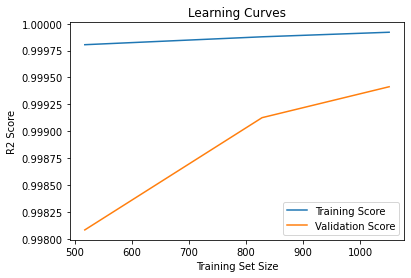

Score R2  0.999539018036186


In [178]:
# Randomize the data and set a constant random state for reproducibility
np.random.seed(666)
dataset = df.sample(frac=1).reset_index(drop=True)

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Training the Random Forest Regressor with default parameters
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


# Plot learning curves to assess the sufficiency of the number of data points
train_sizes, train_scores, val_scores = learning_curve(
    rfr, X_train, y_train, train_sizes=np.array([  517, 828, 1051]), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

# Calculate feature importance
importances = rfr.feature_importances_

# Plot the feature importances in a bar plot


# Use the final model to predict on the test set and evaluate the accuracy
y_pred = rfr.predict(X_test)
r2_score = rfr.score(X_test, y_test)
print("Score R2 ",r2_score)




In [57]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# 

In [179]:
# Test the model on new values
observation_number = 600
grains_test=list(df["Grain"].unique())
PHI1_test=list(df["Phi1 (°)"].unique())
PSI_test=list(df["Psi (°)"].unique())
PHI2_test=list(df["Phi2 (°)"].unique())

In [184]:
k=list(range(600))
print(len(range(int(str(grains_test[0])+str(0)),int(str(grains_test[0])+str(observation_number)))))

10500


R2 Score :  1.0


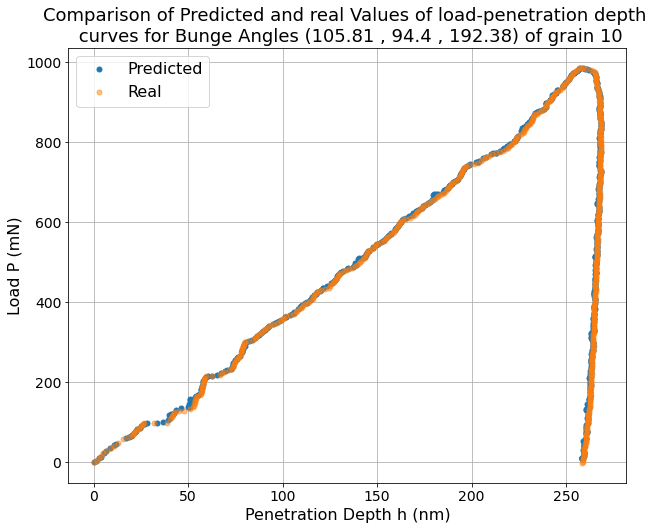

Predicted values [h (nm) P (mN)] : 
 [[1.62320612e-01 4.16545738e-01]
 [1.44148158e+00 3.39579765e+00]
 [2.78762267e+00 1.00167430e+01]
 ...
 [2.58719445e+02 9.41275913e+00]
 [2.58719445e+02 9.41275913e+00]
 [2.58719445e+02 9.41275913e+00]]
R2 Score :  1.0


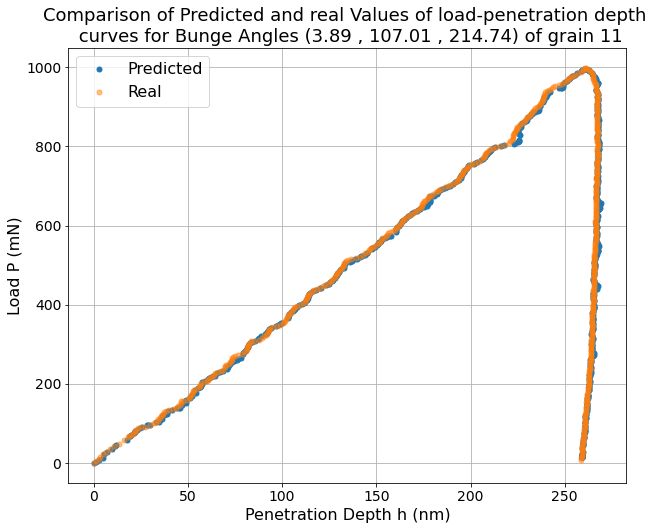

Predicted values [h (nm) P (mN)] : 
 [[2.40939348e-01 8.21432543e-01]
 [1.39625225e+00 3.86838253e+00]
 [2.62104413e+00 8.86303735e+00]
 ...
 [2.59090169e+02 1.39883760e+01]
 [2.59090169e+02 1.39883760e+01]
 [2.59090169e+02 1.39883760e+01]]
R2 Score :  1.0


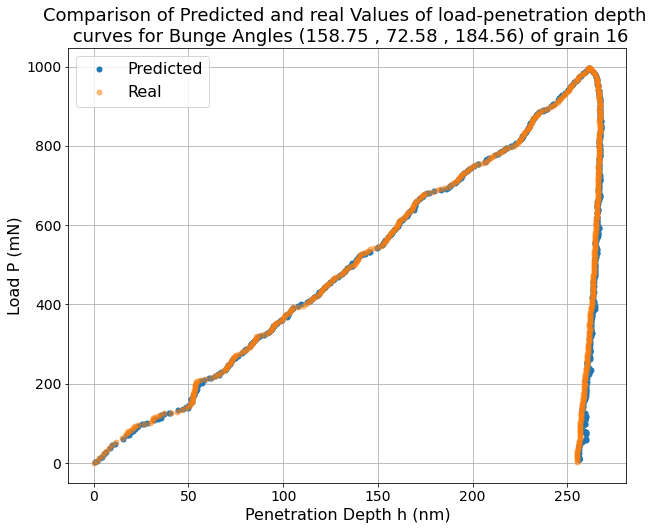

Predicted values [h (nm) P (mN)] : 
 [[  0.42953385   1.4837653 ]
 [  1.570547     4.24759533]
 [  3.12032269  11.91513861]
 ...
 [256.2632771    9.10428117]
 [256.2632771    9.10428117]
 [256.2632771    9.10428117]]
R2 Score :  1.0


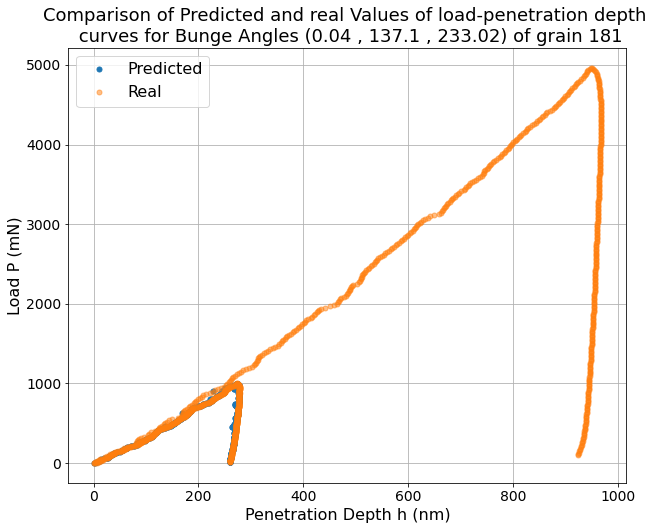

Predicted values [h (nm) P (mN)] : 
 [[  0.96633127   1.46104116]
 [  2.99540474   3.87174442]
 [  4.5119021   10.61802327]
 ...
 [259.80861982  15.22952246]
 [259.80861982  15.22952246]
 [259.80861982  15.22952246]]


In [185]:
from itertools import product
for i in range(0,len(grains_test)-1):
  j_values = list(range(observation_number))
  #k_values = list(range(grain_observation_number_min, grain_observation_number_max + 1 ))
  X_new = np.array([[PHI1_test[i], PSI_test[i], PHI2_test[i], j_values[j], int(str(grains_test[i])+str(j))] for j in range(len(j_values))])
  y_pred = rfr.predict(X_new)
  r2_score = rfr.score(X_new, y_pred)
  print("R2 Score : ",r2_score)
  # Get the actual values for comparison
  y_real = df.loc[(df['Phi1 (°)'] == PHI1_test[i]) & (df['Psi (°)'] == PSI_test[i]) & (df['Phi2 (°)'] == PHI2_test[i]) & (df['Time'] < observation_number) & (df['grain-Time'] < (df['Grain'].astype(str)+str(observation_number)).astype(int)), ['h (nm)', 'P (mN)']].values
  # Set plot parameters
  fig, ax = plt.subplots(figsize=(10, 8))
  ax.set_xlabel('Penetration Depth h (nm)', fontsize=16)
  ax.set_ylabel('Load P (mN)', fontsize=16)
  ax.set_title(f'Comparison of Predicted and real Values of load-penetration depth \n curves for Bunge Angles ({PHI1_test[i]} , {PSI_test[i]} , {PHI2_test[i]}) of grain {grains_test[i]}', fontsize=18)
  ax.tick_params(axis='both', labelsize=14)
  ax.grid(True)

  # Plot the predicted and actual values
  ax.plot(y_pred[:, 0], y_pred[:, 1], '.', label='Predicted', markersize=10)
  ax.plot(y_real[:, 0], y_real[:, 1], '.', label='Real', markersize=10, alpha=0.5)
  ax.legend(fontsize=16, loc='upper left')

  plt.show()

  print("Predicted values [h (nm) P (mN)] : \n",y_pred)

# Predict new observations from new data 

In [195]:
X_new = np.array([[PHI1, PSI , PHI1, i , int(str(GRAIN)+str(i))] for i in range(NUMBER_OF_OBSERVATIONS)])
y_pred = rfr.predict(X_new)
print(y_pred)

[[1.62320612e-01 4.16545738e-01]
 [1.44148158e+00 3.39579765e+00]
 [2.78762267e+00 1.00167430e+01]
 ...
 [2.57876320e+02 9.18650467e+00]
 [2.57876320e+02 9.18650467e+00]
 [2.57876320e+02 9.18650467e+00]]


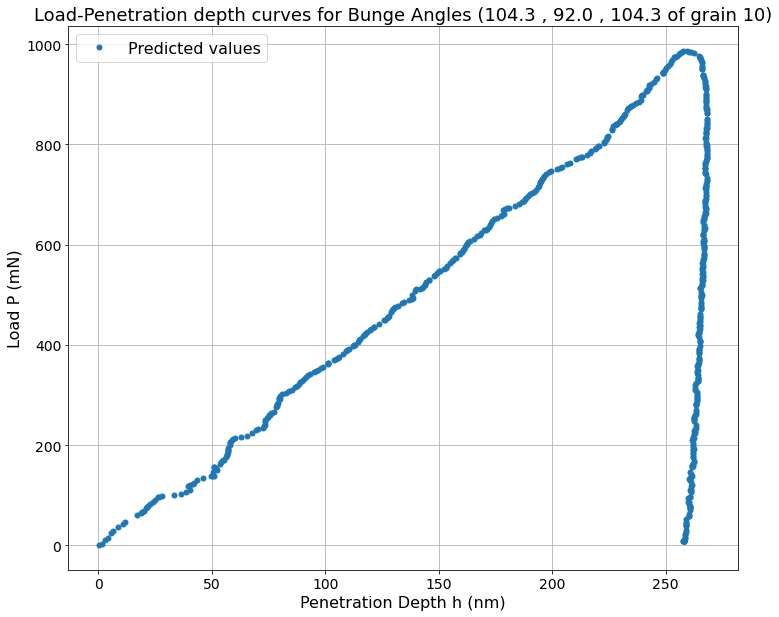

In [196]:
# Set plot parameters
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlabel('Penetration Depth h (nm)', fontsize=16)
ax.set_ylabel('Load P (mN)', fontsize=16)
ax.set_title(f'Load-Penetration depth curves for Bunge Angles ({PHI1} , {PSI} , {PHI1} of grain {GRAIN})', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)

# Plot the relationship between P (mN) and h (nm) predicted values
ax.plot(y_pred[:, 0], y_pred[:, 1], '.', label='Predicted values', markersize=10)
ax.legend(fontsize=16, loc='upper left')

plt.show()
